In [1]:
# to handle datasets
import pandas as pd
from pandas import DataFrame
import numpy as np
pd.pandas.set_option('display.max_columns', None)

# to plot
import matplotlib.pyplot as plt
import seaborn as sns

# to build models
from sklearn.linear_model import Lasso

# to evaluate the models
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [2]:
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

y_train = X_train['points']
y_test = X_test['points']

### Load Pre-Selected Features

MarkDown practice

In [3]:
features = pd.read_csv('selected_features.csv')
features = features['0'].to_list()
# ['0'] is selecting the column in which the series was saved
# features then converted to a list format from series
features

['minsPlayed',
 'goalsScored',
 'assists',
 'cleanSheets',
 'goalsConceded',
 'ownGoals',
 'penSaved',
 'yelCards',
 'redCards',
 'saves',
 'bonus',
 'influence',
 'creativity',
 'threat',
 'costGBP',
 'playerName',
 'oppositionTeam']

In [4]:
X_train = X_train[features]
X_test = X_test[features]
X_test.head()

,minsPlayed,goalsScored,assists,cleanSheets,goalsConceded,ownGoals,penSaved,yelCards,redCards,saves,bonus,influence,creativity,threat,costGBP,playerName,oppositionTeam
0,90.0,2.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,3.0,6.6,17.4,4.0,6.0,229,3
1,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,12,13
2,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.4,0.7,0.0,5.0,200,10
3,79.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.2,1.2,0.0,5.0,242,12
4,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.4,0.4,0.0,5.5,120,14


### Regularised Linear Regression: Lasso

In [5]:
# set up the model remembering to set the random_state/seed
lin_model = Lasso(alpha=0.005, random_state=0)
# train the model
lin_model.fit(X_train, y_train)

Lasso(alpha=0.005, random_state=0)

The performance of the Lasso can be evaluated using the mean squared error (mse), the root of the mean squared error (rmse) and r2 predictions for the train set

In [6]:
# predict train using the model
pred = lin_model.predict(X_train)
# determine the mse, rmse and r2
print('train mse: {}'.format(int(mean_squared_error(y_train, pred))))
print('train rmse: {}'.format(int(sqrt(mean_squared_error(y_train, pred)))))
print('train r2: {}'.format(r2_score(y_train, pred)))
print()
# predict test using the model
pred = lin_model.predict(X_test)
# determine the mse, rmse and r2
print('test mse: {}'.format(int(mean_squared_error(y_test, pred))))
print('test rmse: {}'.format(int(sqrt(mean_squared_error(y_test, pred)))))
print('test r2: {}'.format(r2_score(y_test, pred)))


train mse: 0
train rmse: 0
train r2: 0.9131129207641951

test mse: 0
test rmse: 0
test r2: 0.9183795212129393


not sure what the above shows me yet as zero mse and rmse seem too good to be true **more graphs needed**

In [7]:
print(X_train['playerName'].nunique())
for label in X_train['playerName'].unique():
    print('{}: has {} mean points'.format(label,int(y_train[label].mean())))

356
11: has 2 mean points
197: has 1 mean points
291: has 1 mean points
158: has 1 mean points
72: has 1 mean points
223: has 1 mean points
186: has 6 mean points
160: has 3 mean points
209: has 8 mean points
147: has 2 mean points
345: has 8 mean points
241: has 8 mean points
335: has 6 mean points
107: has 2 mean points
151: has 2 mean points
80: has 1 mean points
278: has 1 mean points
246: has 6 mean points
286: has 7 mean points
111: has 7 mean points
294: has 1 mean points
203: has 6 mean points
220: has 6 mean points
275: has 1 mean points
214: has 2 mean points
266: has 1 mean points
187: has 1 mean points
287: has 3 mean points
154: has 6 mean points
74: has 2 mean points
273: has 2 mean points
196: has 1 mean points
248: has 9 mean points
178: has 6 mean points
51: has 0 mean points
140: has 2 mean points
121: has 5 mean points
73: has 1 mean points
137: has 2 mean points
110: has 0 mean points
228: has 1 mean points
76: has 1 mean points
23: has 6 mean points
34: has 8 mean 

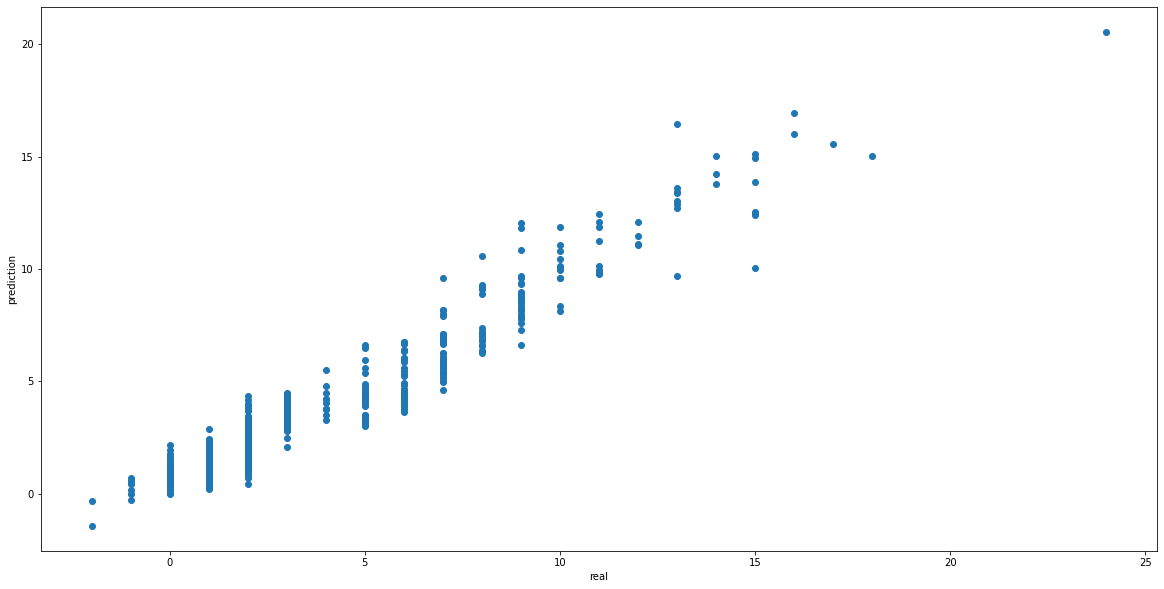

In [8]:
# a scatter plot can be used to evaluate further
plt.figure(figsize=(20,10))
plt.ylabel('prediction')
plt.xlabel('real')
plt.scatter(y_test, lin_model.predict(X_test))

In [9]:
# checking the closeness of the max values
print(y_test.max())
print(lin_model.predict(X_test).max())

24.0
20.56018696612037


Evaluate the distribution of random errors

<AxesSubplot:>

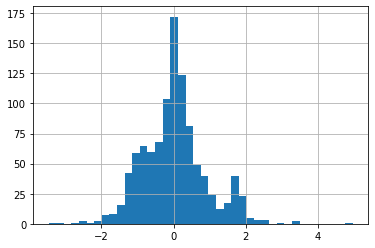

In [10]:
errors = y_test - lin_model.predict(X_test)
errors.hist(bins=40)

Appears normally enough distributed to not be alarming

### Feature Importance

Text(0.5, 1.0, 'Feature Importance')

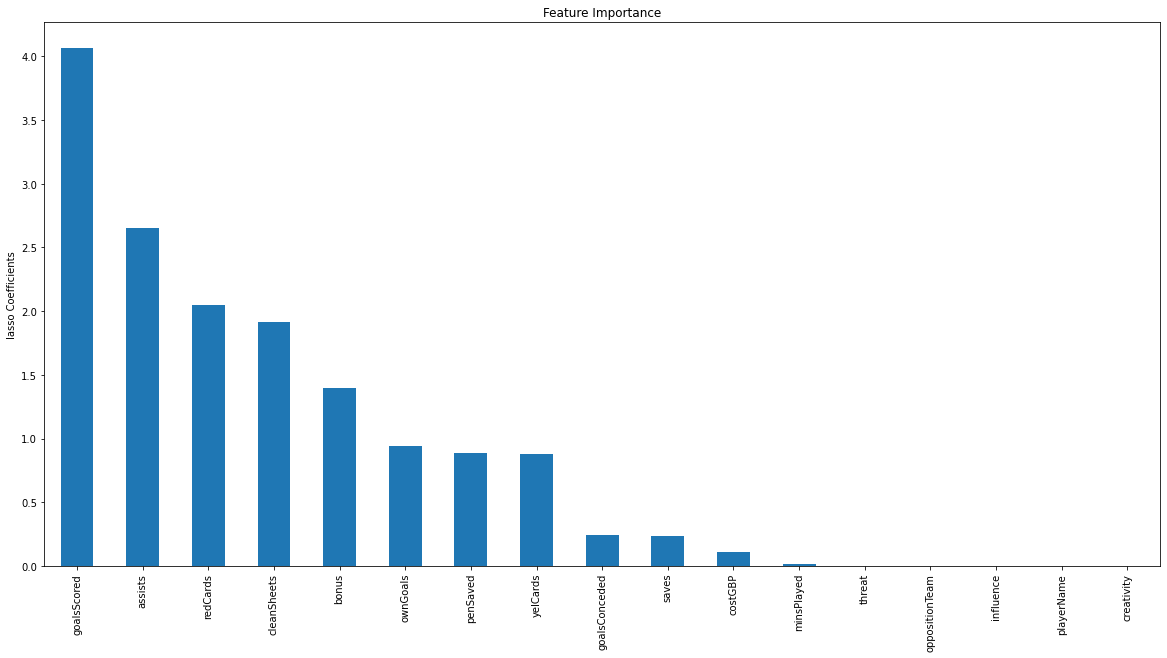

In [11]:
# rank the features in order of importance / influence
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(20,10))
plt.ylabel('lasso Coefficients')
plt.title('Feature Importance')